# Hedging

## Table of Contents
- [1st Section](#Loading-in-the-data) is where I import the files
- [2nd section](#Hedging-extraction) is where I extract the hedge information
- [3rd section](#Hedging-analysis) is where I analyze hedging
- [Conclusion](#Conclusion) summarizes the notebook

## Loading in the data

In [1]:
# load in the packages
import numpy as np
import pandas as pd
import pickle
import re
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from scipy import stats

In [2]:
# read in the data
f = open('../analysis_notebooks/discourse_df.pkl', 'rb')
discourse_df = pickle.load(f)
f.close()

## Hedging extraction

I will look to see if these hedging words and phrases appear more in one specific gender's speech or not:
* I guess
* I think
* Maybe
* Might
* Perhaps
* Possibly

In [3]:
# i guess
def get_guess(x):
    pattern = r'\bI guess\b'
    guesses = re.findall(pattern, x)
    return len(guesses)

# adding data to the data frames
discourse_df['guess_count'] = discourse_df.utterance.apply(get_guess)

In [4]:
# i think
def get_think(x):
    pattern = r'\bI think\b'
    thinks = re.findall(pattern, x)
    return len(thinks)

# adding data to the data frames
discourse_df['think_count'] = discourse_df.utterance.apply(get_think)

In [5]:
# maybe
def get_maybe(x):
    pattern = r'\b[mM]aybe\b'
    maybes = re.findall(pattern, x)
    return len(maybes)

# adding data to the data frames
discourse_df['maybe_count'] = discourse_df.utterance.apply(get_maybe)

In [6]:
# might
def get_might(x):
    pattern = r'\b[mM]ight\b'
    mights = re.findall(pattern, x)
    return len(mights)

# adding data to the data frames
discourse_df['might_count'] = discourse_df.utterance.apply(get_might)

In [7]:
# perhaps
def get_perhaps(x):
    pattern = r'\b[pP]erhaps\b'
    perhapses = re.findall(pattern, x)
    return len(perhapses)

# adding data to the data frames
discourse_df['perhaps_count'] = discourse_df.utterance.apply(get_perhaps)

In [8]:
# possibly
def get_possibly(x):
    pattern = r'\b[pP]ossibly\b'
    possiblys = re.findall(pattern, x)
    return len(possiblys)

# adding data to the data frames
discourse_df['possibly_count'] = discourse_df.utterance.apply(get_possibly)

In [9]:
discourse_df.head()

,conversation_ID,line_ID,character_ID,character_name,gender,movie_ID,movie_title,genres,movie_year,movie_decade,...,tokens,sent_count,token_count,avg_sent_length,guess_count,think_count,maybe_count,might_count,perhaps_count,possibly_count
0,24,L1045,u0,BIANCA,F,m0,10 things i hate about you,"['comedy', 'romance']",1999,1990,...,"[They, do, not, !]",1,4,4.000000,0,0,0,0,0,0
1,23,L985,u0,BIANCA,F,m0,10 things i hate about you,"['comedy', 'romance']",1999,1990,...,"[I, hope, so, .]",1,4,4.000000,0,0,0,0,0,0
2,22,L925,u0,BIANCA,F,m0,10 things i hate about you,"['comedy', 'romance']",1999,1990,...,"[Let, 's, go, .]",1,4,4.000000,0,0,0,0,0,0
3,21,L872,u0,BIANCA,F,m0,10 things i hate about you,"['comedy', 'romance']",1999,1990,...,"[Okay, --, you, 're, gon, na, need, to, learn,...",1,13,13.000000,0,0,0,0,0,0
4,21,L870,u0,BIANCA,F,m0,10 things i hate about you,"['comedy', 'romance']",1999,1990,...,"[I, 'm, kidding, ., You, know, how, sometimes,...",3,25,8.333333,0,0,0,0,0,0


## Hedging analysis

### I guess

In [10]:
# what's the use of 'I guess' by gender?
discourse_df.groupby('gender').agg({'guess_count': ['sum', 'mean', 'max', 'std']})

guess_count                        
                sum      mean max       std
gender                                     
A                34  0.003735   1  0.061004
F               475  0.005740   3  0.076973
M               920  0.004891   3  0.070826
unknown          66  0.002698   1  0.051875

Male characters have the most instances of *I guess* but they make up the bulk of the characters in the corpus. When the usage is averaged out, female characters use *I guess* more. Both male and female characters have the highest number of instances of *I guess* in one turn with three each, while ambiguous and unknown only have one or zero per turn. Male and female characters have similar standard deviations so their distribution is similar. Unknown characters have the smallest standard deviation.

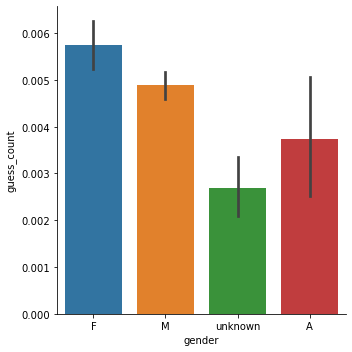

In [11]:
# let's visualize this difference
sns.catplot(data=discourse_df, x='gender', y='guess_count', kind='bar')
plt.savefig('../data_visualization/guess_usage.png')
plt.show()

In [12]:
# is there a statistically significant difference between this variance?
stats.f_oneway(discourse_df[discourse_df.gender=='F'].guess_count, discourse_df[discourse_df.gender=='M'].guess_count, discourse_df[discourse_df.gender=='unknown'].guess_count, discourse_df[discourse_df.gender=='A'].guess_count)

F_onewayResult(statistic=12.527656991347703, pvalue=3.467378845000514e-08)

This variation is significant at p ≥ 0.05. Even though the mean usage is small the difference between these groups is significant.

### I think

In [13]:
# what's the use of 'I think' by gender?
discourse_df.groupby('gender').agg({'think_count': ['sum', 'mean', 'max', 'std']})

think_count                        
                sum      mean max       std
gender                                     
A                94  0.010326   2  0.106393
F              1075  0.012991   4  0.118859
M              2223  0.011819   5  0.114101
unknown         202  0.008258   3  0.094910

Male characters have the most instances of *I think* but they make up the bulk of the characters in the corpus. When the usage is averaged out, female characters use *I think* slightly more. A male characters has the highest number of instances of *I think* in one turn with five. Characters of all gender have a turn where they use *I think* more than once. *I think* is more common than *I guess*. Male and female characters have similar standard deviations so their distribution is similar. Unknown characters have the smallest standard deviation.

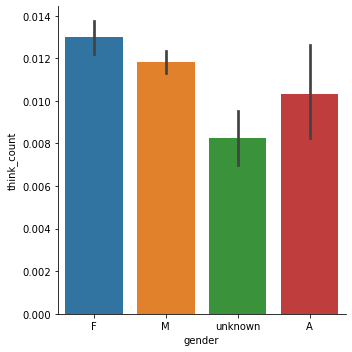

In [14]:
# graph
sns.catplot(data=discourse_df, x='gender', y='think_count', kind='bar')
plt.savefig('../data_visualization/think_usage.png')
plt.show()

In [15]:
# is there a statistically significant difference between this variance?
stats.f_oneway(discourse_df[discourse_df.gender=='F'].think_count, discourse_df[discourse_df.gender=='M'].think_count, discourse_df[discourse_df.gender=='unknown'].think_count, discourse_df[discourse_df.gender=='A'].think_count)

F_onewayResult(statistic=11.43269881324815, pvalue=1.715473870152785e-07)

This variation is significant at p ≥ 0.05. Even though the mean usage is small the difference between these groups is significant.

### Maybe

In [16]:
# what's the use of 'maybe' by gender?
discourse_df.groupby('gender').agg({'maybe_count': ['sum', 'mean', 'max', 'std']})

maybe_count                        
                sum      mean max       std
gender                                     
A               116  0.012743   2  0.116965
F              1160  0.014018   4  0.129501
M              2481  0.013191   5  0.124732
unknown         257  0.010507   3  0.109690

Male characters have the most instances of *maybe* but they make up the bulk of the characters in the corpus. When the usage is averaged out, female characters use *maybe* slightly more. A male characters has the highest number of instances of *maybe* in one turn with five. Characters of all gender have a turn where they use *maybe* more than once. *Maybe* is the most popular hedging word. Male and female characters have similar standard deviations so their distribution is similar. Unknown characters have the smallest standard deviation.

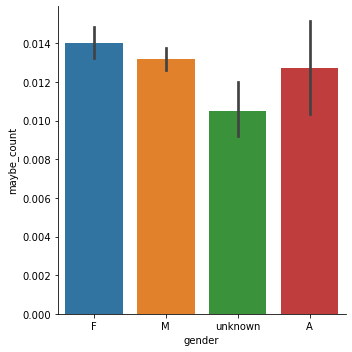

In [17]:
# graph
sns.catplot(data=discourse_df, x='gender', y='maybe_count', kind='bar')
plt.savefig('../data_visualization/maybe_usage.png')
plt.show()

In [18]:
# is there a statistically significant difference between this variance?
stats.f_oneway(discourse_df[discourse_df.gender=='F'].maybe_count, discourse_df[discourse_df.gender=='M'].maybe_count, discourse_df[discourse_df.gender=='unknown'].maybe_count, discourse_df[discourse_df.gender=='A'].maybe_count)

F_onewayResult(statistic=5.0318882406675645, pvalue=0.0017369807871935288)

This variation is significant at p ≥ 0.05. Even though the mean usage is small the difference between these groups is significant.

### Might

In [19]:
# what's the use of 'might' by gender?
discourse_df.groupby('gender').agg({'might_count': ['sum', 'mean', 'max', 'std']})

might_count                        
                sum      mean max       std
gender                                     
A                50  0.005493   2  0.075385
F               489  0.005909   3  0.079280
M              1207  0.006417   3  0.082599
unknown         186  0.007604   2  0.089649

Male characters have the most instances of *might* but they make up the bulk of the characters in the corpus. When the usage is averaged out, unknown characters use *might* more. *Might* is tricky because it can be used as a verb and noun, where the noun *might* would not be indicative of hedging. This can be remedied by taking part of speech into account. A male and female character have the highest number of instances of *maybe* in one turn with three. Characters of all gender have a turn where they use *might* more than once. Unknown characters have the highest standard deviation. The other characters standard deviation is similar, with ambiguous characters having the smallest standard deviation.

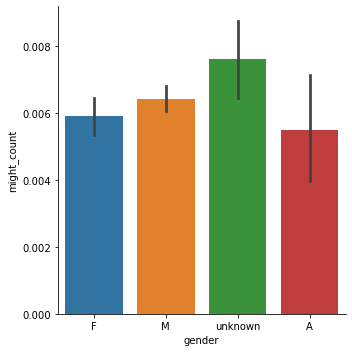

In [20]:
# graph
sns.catplot(data=discourse_df, x='gender', y='might_count', kind='bar')
plt.savefig('../data_visualization/might_usage.png')
plt.show()

In [21]:
# is there a statistically significant difference between this variance?
stats.f_oneway(discourse_df[discourse_df.gender=='F'].might_count, discourse_df[discourse_df.gender=='M'].might_count, discourse_df[discourse_df.gender=='unknown'].might_count, discourse_df[discourse_df.gender=='A'].might_count)

F_onewayResult(statistic=3.069421268090923, pvalue=0.026647810888604608)

This variation is significant at p > 0.05. Even though the mean usage is small the difference between these groups is significant.

### Perhaps

In [22]:
# what's the use of 'perhaps' by gender?
discourse_df.groupby('gender').agg({'perhaps_count': ['sum', 'mean', 'max', 'std']})

perhaps_count                        
                  sum      mean max       std
gender                                       
A                  13  0.001428   1  0.037765
F                 107  0.001293   2  0.036931
M                 346  0.001840   2  0.044673
unknown            79  0.003230   2  0.057455

Male characters have the most instances of *perhaps* but they make up the bulk of the characters in the corpus. When the usage is averaged out, unknown characters use *perhaps* the most. Male, female, and unknown characters have the highest number of instances of *perhaps* in one turn with two. Unknown characters have the highest standard deviation. Female characters have the smallest standard deviation.

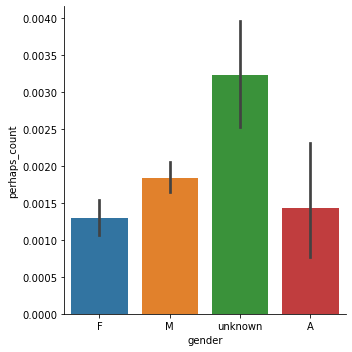

In [23]:
# graph
sns.catplot(data=discourse_df, x='gender', y='perhaps_count', kind='bar')
plt.savefig('../data_visualization/perhaps_usage.png')
plt.show()

In [24]:
# is there a statistically significant difference between this variance?
stats.f_oneway(discourse_df[discourse_df.gender=='F'].perhaps_count, discourse_df[discourse_df.gender=='M'].perhaps_count, discourse_df[discourse_df.gender=='unknown'].perhaps_count, discourse_df[discourse_df.gender=='A'].perhaps_count)

F_onewayResult(statistic=12.69065531618593, pvalue=2.7321183698580023e-08)

This variation is significant at p > 0.05. Even though the mean usage is small the difference between these groups is significant.

### Possibly

In [25]:
# what's the use of 'possibly' by gender?
discourse_df.groupby('gender').agg({'possibly_count': ['sum', 'mean', 'max', 'std']})

possibly_count                        
                   sum      mean max       std
gender                                        
A                    5  0.000549   1  0.023431
F                   46  0.000556   1  0.023571
M                   99  0.000526   2  0.023167
unknown             15  0.000613   2  0.026356

The mean usage for *possibly* is the smallest out of all the hedging words and phrases and *possibly* is the least used hedging word or phrase. Male characters have the most instances of *possibly*. Unknown has slightly more average use, but the usage across all genders is similar and very small. Both male and unknown characters use *possibly* twice in one turn, while ambiguous and female characters only ever use it once a turn.

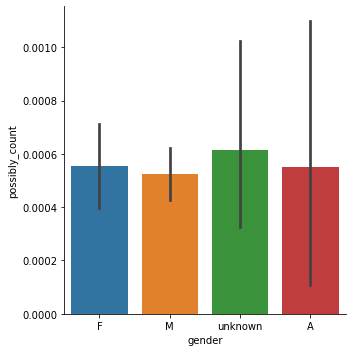

In [26]:
# graph
sns.catplot(data=discourse_df, x='gender', y='possibly_count', kind='bar')
plt.savefig('../data_visualization/possibly_usage.png')
plt.show()

In [27]:
# is there a statistically significant difference between this variance?
stats.f_oneway(discourse_df[discourse_df.gender=='F'].possibly_count, discourse_df[discourse_df.gender=='M'].possibly_count, discourse_df[discourse_df.gender=='unknown'].possibly_count, discourse_df[discourse_df.gender=='A'].possibly_count)

F_onewayResult(statistic=0.11210033776361256, pvalue=0.9530626382670797)

This variation is not significant at p > 0.05. This is the only hedging word or phrase that does not have significant variance across gender. It is the least used hedging word, so a larger sample size might result in a significant difference.

## Conclusion

Female characters use *I guess*, *I think*, and *maybe* the most. For *might*, *perhaps*, and *possibly* characters with unknown gender have the highest usage. For *I think* and *maybe* male characters are not far behind in usage, but the ANOVA tests still indicate that the difference across the groups are significant at p ≥ 0.05. *Possibly* was the least used out of the hedging words and phrases and was also the only word or phrase that did not have significant variance across the groups.

Based on these findings there is difference in how the genders are represented usage hedging in their speech.